In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re,glob,os
from collections import defaultdict
import dgutils
import json

# Notebook display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import dframe_tools as dtools
import plot_tools as ptools
import gen_resubmit as gensub

# Comment out for description of below modules
# dtools.help()
# ptools.help()
# gensub.help()

### If you import data from csv, put 1 here
is_csv = 1


#=========================================================================
if is_csv == 1:

    dbase = pd.read_csv('../data/Largebox_data.csv')
    dbase['filedic'] = dbase['filedic'].apply(lambda x: json.loads(x.replace("'", '"')))

else:
### from raw data
    path = '/home/sang/UVM/H4large/OUTPUT'
    dbase = dtools.df_pimc(path, skip = 0, noenergy = 1, replace = 1)

dfdict = ptools.datadic(dbase)

dict_keys(['0.15,-93.0'])


In [2]:
##plot style
plot_style = {'notebook':'../include/notebook.mplstyle','sans':'../include/sans_NC.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['sans'])
figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# setup a possible custom font path
from matplotlib import font_manager
def what_font_path (filename):
    for p in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
        if p.find(filename) != -1:
            return p

font_path,bold_font_path = '.','.'
if 'LOCAL_FONT_PATH' in os.environ:
    font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Light-08.ttf'
    bold_font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Bold-02.ttf'
    
else:
    # local path (custom)
    font_path = what_font_path('HelveticaNeue-Light-08')
    bold_font_path = what_font_path('HelveticaNeue-Bold-02')
    italic_font_path = what_font_path('HelveticaNeue-Italic-03')

In [3]:
### Export data
# dbase.to_csv('../data/Largebox_data.csv',index=False)

In [4]:
# Initialize outputs
case_out = {}
case_nmean = {}
case_nerr = {}
case_alist = {}
case_aerrlist = {}

In [5]:
subset = dbase.sort_values('T',ascending=True)
Tset = subset['T']
nset = subset['n']
nerrset = subset['nerr']
kapset = subset['kap']
rhosset = subset['rhos']
rhoserrset = subset['rhoserr']

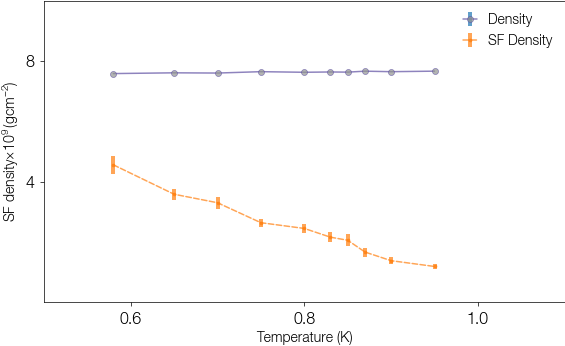

In [15]:
plt.style.reload_library()
fig1 = plt.figure('fig1' ,figsize = [3.4646*1.2, 2.14122*1.2])
dgutils.fonts.set_custom_font(font_path)

plt.xlim(0.5, 1.1)
plt.ylim(0, 10)

area = np.sqrt(3)/4*6*1.42
mass = 10*6.7
pden = nset/144/area*mass
sden = nset/144*rhosset/area*mass

plt.errorbar(Tset, pden, yerr=nerrset/144/area*mass, label = 'Density',
             ms = 6, mfc = '#92959180',
             fmt='.-', ecolor=plt.get_cmap('tab10')(0), elinewidth=2, capsize=0, alpha = 0.7
            )
# plt.bar(Tset, pden, width=0.015, color = 'lightgrey', )
plt.errorbar(Tset, sden, yerr=nset/144*rhoserrset/area*mass, label = 'SF Density',
             ms = 3, c = plt.get_cmap('tab10')(1),
             fmt='.--', ecolor=plt.get_cmap('tab10')(1), elinewidth=2, capsize=0, alpha = 0.7
            )
# plt.bar(Tset, rhosset,)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel(r'SF density' +r'$\times 10^{9} \, (\rm{g cm}^{-2}$)')
plt.xticks([0.6, 0.8, 1.0])
plt.yticks([4, 8, ])
plt.tight_layout()
plt.show()

# save?
fig1.savefig('../figures/largeBox.pdf')

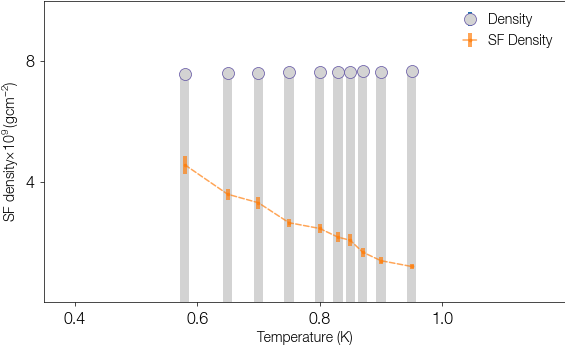

In [13]:
plt.style.reload_library()
with plt.style.context(plot_style['sans']):
    fig1 = plt.figure('fig1' ,figsize = [3.4646*1.2, 2.14122*1.2])
    dgutils.fonts.set_custom_font(font_path)

    plt.xlim(0.35, 1.2)
    plt.ylim(0, 10)

    area = np.sqrt(3)/4*6*1.42
    mass = 10*6.7
    pden = nset/144/area*mass
    sden = nset/144*rhosset/area*mass

    plt.errorbar(Tset, pden, yerr=nerrset/144/area*mass, label = 'Density',
                 ms = 12, mfc = 'lightgrey',
                 fmt='.', ecolor=plt.get_cmap('tab10')(0), elinewidth=2, capsize=0, alpha = 1.0
                )
    plt.bar(Tset, pden, width=0.015, color = 'lightgrey', )
    plt.errorbar(Tset, sden, yerr=nset/144*rhoserrset/area*mass, label = 'SF Density',
                 ms = 3, c = plt.get_cmap('tab10')(1),
                 fmt='.--', ecolor=plt.get_cmap('tab10')(1), elinewidth=2, capsize=0, alpha = 0.7
                )
    # plt.bar(Tset, rhosset,)
    plt.legend()
    plt.xlabel('Temperature (K)')
    plt.ylabel(r'SF density'+r'$\times 10^{9} \, ({\rm g cm}^{-2}$)')
    plt.xticks([0.4, 0.6, 0.8, 1.0])
    plt.yticks([4, 8, ])
    plt.tight_layout()
    plt.show()

    # save?
    fig1.savefig('../figures/largeBox.pdf')

In [7]:
# target = dbase

In [8]:
# print(len(target))
# date = 'May03'
# gensub.continue_from(target, 'pimc_large_cont', date, suffix = 0)